In [1]:
import ROOT as r
import ctypes
import numpy as np
from array import array
import root_numpy as rn
import matplotlib.pyplot as plt
import pickle

/home/hep/davide/miniconda3/envs/root_env/lib/ROOT.py:301: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return _orig_ihook( name, *args, **kwds )


In [2]:
l_flv = ['e','mu']
data_type = ['MC','small_data']
tree_name = 'Ds_OfflineTree/DecayTree'

In [3]:
l_index = 1
data_index = None 

In [4]:
def find_file_path(l_index=l_index, data_index=data_index): 
    return "/disk/lhcb_data/davide/Rphipi/"+data_type[data_index]+"/Ds_phipi_"+l_flv[l_index]+l_flv[l_index]+"/Ds_phipi_"+l_flv[l_index]+l_flv[l_index]+".root"

In [5]:
data = r.TFile(find_file_path(l_index=l_index, data_index=1))
MC = r.TFile(find_file_path(l_index=l_index, data_index=0))

In [6]:
t_data = data.Get("Ds_OfflineTree/DecayTree")
t_data

<ROOT.TTree object ("DecayTree") at 0x5556c05fc2b0>

In [7]:
t_MC = MC.Get("Ds_OfflineTree/DecayTree")
t_MC

<ROOT.TTree object ("DecayTree") at 0x5556c05f3280>

In [8]:
#Switch on only the branches that you need
t_data.SetBranchStatus("*",0)
t_MC.SetBranchStatus("*",0)

branches_needed = [
                    "Ds_ENDVERTEX_CHI2",
                    "Ds_ENDVERTEX_NDOF",
                    "Ds_OWNPV_CHI2",
                    "Ds_OWNPV_NDOF",
                    "Ds_IPCHI2_OWNPV",
                    "Ds_IP_OWNPV",
                    "Ds_DIRA_OWNPV",
                    "Ds_ConsD_M",
                    l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index],
                    l_flv[l_index]+"_minus_MC15TuneV1_ProbNN"+l_flv[l_index],
                    "Ds_Hlt1TrackMVADecision_TOS",
                    "Ds_Hlt2RareCharmD2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+"OSDecision_TOS",
                    "Ds_Hlt2Phys_TOS",
    
                    "phi_ENDVERTEX_CHI2",
                    "phi_ENDVERTEX_NDOF",
                    "phi_OWNPV_CHI2",
                    "phi_OWNPV_NDOF",
                    "phi_IP_OWNPV",
                    "phi_IPCHI2_OWNPV",
                    "phi_DIRA_OWNPV",
                    "phi_M",
                  ] 

for branch in branches_needed:
    t_data.SetBranchStatus(branch, 1)
    t_MC.SetBranchStatus(branch, 1)

In [9]:
#Count the events in the tuple

MC_count=0
for event in enumerate(t_MC):
    MC_count+=1
    
data_count=0
for event in enumerate(t_data):
    data_count+=1
print("MC event count {0}, data event count {1}".format(MC_count,data_count))

MC event count 49002, data event count 233629


In [32]:
#Create a dictionary

#dict ={'branch_name'=[branch_value[event]]}

MC_tuple_dict = {}

for branch in branches_needed:
    
    MC_tuple_dict[branch] = rn.root2array(
        
        filenames=find_file_path(l_index, 0),
        treename = tree_name,
        branches = branch,
        start=0,
        stop=MC_count,
    )
    
data_tuple_dict = {}

for branch in branches_needed:
    
    data_tuple_dict[branch] = rn.root2array(
        
        filenames=find_file_path(l_index, 1),
        treename = tree_name,
        branches = branch,
        start=0,
        stop=data_count,
    )

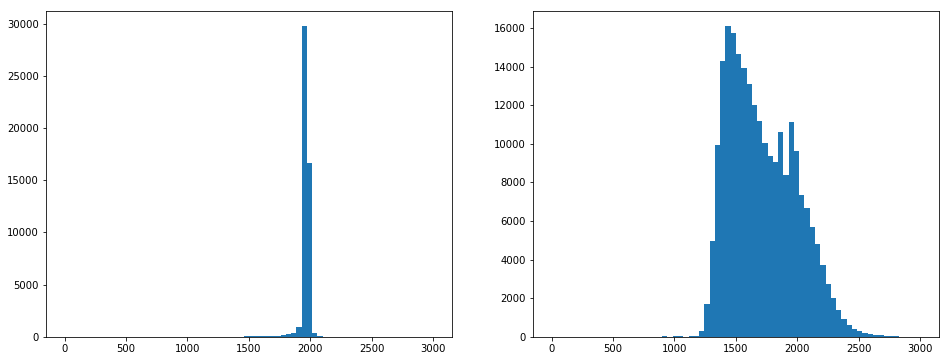

In [33]:
#Check the Ds mass plot

Ds_constrained_mass_MC = np.array([MC_tuple_dict["Ds_ConsD_M"][i][0] for i in range(len(MC_tuple_dict["Ds_ConsD_M"]))])
Ds_constrained_mass_data = np.array([data_tuple_dict["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict["Ds_ConsD_M"]))])
plt.subplot(1,2,1)
plt.hist(Ds_constrained_mass_MC,bins=70, range=(0,3000));
plt.subplot(1,2,2)
plt.hist(Ds_constrained_mass_data,bins=70, range=(0,3000));
fig = plt.gcf()
fig.set_size_inches(16,6)

In [34]:
#HLT1 PRESELECTION
#data_tuple_dict_presel_1={}
#MC_tuple_dict_presel_1={}
#
#for label in branches_needed:  
#
#    data_tuple_dict_presel_1[label] = data_tuple_dict[label][data_tuple_dict["Ds_Hlt1TrackMVADecision_TOS"]]
#    MC_tuple_dict_presel_1[label] = MC_tuple_dict[label][MC_tuple_dict["Ds_Hlt1TrackMVADecision_TOS"]]

#RareCharm D2pi l l HLT2 PRESELECTION

#data_tuple_dict_presel_2={}
#MC_tuple_dict_presel_2={}
#
#for label in branches_needed:  
#
#    data_tuple_dict_presel_2[label] = data_tuple_dict_presel_1[label][data_tuple_dict_presel_1["Ds_Hlt2RareCharmD2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+"OSDecision_TOS"]]
#    MC_tuple_dict_presel_2[label] = MC_tuple_dict_presel_1[label][MC_tuple_dict_presel_1["Ds_Hlt2RareCharmD2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+"OSDecision_TOS"]]
#
##PID preselection
#
##MC_PID_indices=np.where(MC_tuple_dict_presel_2[l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index]]>0.4)
#
#data_PID_indices_plus=np.where(data_tuple_dict_presel_2[l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index]]>0.4)
#data_PID_indices_minus=np.where(data_tuple_dict_presel_2[l_flv[l_index]+"_minus_MC15TuneV1_ProbNN"+l_flv[l_index]]>0.4)
#
#data_PID_indices = np.intersect1d(data_PID_indices_plus,data_PID_indices_minus)
#
#data_tuple_dict_presel_3={}
#MC_tuple_dict_presel_3={}
#
#for label in branches_needed:  
#
#    data_tuple_dict_presel_3[label] = data_tuple_dict_presel_2[label][data_PID_indices]
#    MC_tuple_dict_presel_3[label] = MC_tuple_dict_presel_2[label]#[MC_PID_indices]
#


In [35]:
#np.float(MC_tuple_dict_presel_1["Ds_ConsD_M"].shape[0])/np.float(MC_tuple_dict["Ds_ConsD_M"].shape[0])

In [36]:
#plt.hist([data_tuple_dict["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict["Ds_ConsD_M"]))],alpha=0.2,bins=70,range=(1000,3000));
#plt.hist([data_tuple_dict_presel_1["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict_presel_1["Ds_ConsD_M"]))],alpha=0.3,bins=70,range=(1000,3000));
##plt.hist([data_tuple_dict_presel_2["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict_presel_2["Ds_ConsD_M"]))],alpha=0.4,bins=70,range=(1000,3000));
##plt.hist([data_tuple_dict_presel_3["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict_presel_3["Ds_ConsD_M"]))],alpha=0.6,bins=70,range=(1000,3000));
#fig=plt.gcf()
#fig.set_size_inches(16,10)

In [37]:
#data_tuple_dict=data_tuple_dict_presel_1
#MC_tuple_dict=MC_tuple_dict_presel_1

In [38]:
#Retrieve mc signal and data bkg events
data_bkg_indices=[]
MC_sig_indices=[]


for i in range(len(data_tuple_dict["Ds_ConsD_M"])):
    #retrieving the Ds reconstructed mass
    
    #if 850<data_tuple_dict["phi_M"][i]<1150:
        Ds_m = data_tuple_dict["Ds_ConsD_M"][i]
    
    #selecting the out of signal regions
        if 0<Ds_m<1850 or 2050 < Ds_m < 2600:
            data_bkg_indices.append(i)
        
for i in range(len(MC_tuple_dict["Ds_ConsD_M"])):
    
    #retrieving the Ds reconstructed mass
    #if 850<MC_tuple_dict["phi_M"][i]<1150:
        Ds_m = MC_tuple_dict["Ds_ConsD_M"][i]
    
    #selecting the signal regions
        if 1850<Ds_m<2050:
            MC_sig_indices.append(i)

In [39]:
#Create the dict tuples with all MC signal and data bkg events

data_tuple_bkg={}
MC_tuple_sig ={}

for label in branches_needed:  

    data_tuple_bkg[label] = data_tuple_dict[label][data_bkg_indices]
    MC_tuple_sig[label] = MC_tuple_dict[label][MC_sig_indices]
    

In [40]:
MC_tuple_sig["Ds_ConsD_M"].shape

(47950,)

In [41]:
def plot_sb_comparison(nbins=None, particle=None, variable=None, 
                       MC_sig=None, data_bkg=None, 
                       width_MC=None, width_data=None,):
                       #min_plt_range=None, max_plt_range=None):
    
    #Determine maximum between MC and data
    if "CHI2" in variable:
        if np.max(MC_sig)>np.max(data_bkg):
            upper_limit=np.max(MC_sig)
        else:
            upper_limit=np.max(data_bkg)
        
        lower_limit=0
    if "DIRA" in variable:
        lower_limit=0.99980
        upper_limit=1.
        
    if "prob" in variable:
        lower_limit=0.
        upper_limit=1.
        
    if "Hlt" in variable:
        lower_limit=0.
        upper_limit=2.
    
    #Create and fill MC Signal histogram

    h_mc= r.TH1F(particle+" "+variable+" MC/data comparison", particle+" "+variable+" MC/data comparison", nbins, lower_limit, upper_limit)
    
    for i in range(len(MC_sig)):
        h_mc.Fill(MC_sig[i])
    
    n1=h_mc.Integral("width")
    h_mc.Scale(1/n1)
    h_mc.Integral("width");
    
    #Create and fill data bkg histogram
    h_data= r.TH1F(particle+" "+variable+" from data", particle+" "+variable+" from data", nbins, lower_limit, upper_limit)
    for i in range(len(data_bkg)):
        h_data.Fill(data_bkg[i])
        
    n2=h_data.Integral("width")
    h_data.Scale(1/n2)
    h_data.Integral("width");
    
    a=[h_mc.GetBinContent(i) for i in range(nbins)]
    b=[h_mc.GetBinCenter(i) for i in range(nbins)]
    c=[h_data.GetBinContent(i) for i in range(nbins)]
    d=[h_data.GetBinCenter(i) for i in range(nbins)]
    plt.title(particle+" "+variable+" Signal MC/ data comparison", fontsize=20)
    
    plt.bar(b,a,width=width_MC,alpha=0.6, label="Signal MC")
    plt.bar(d,c,width=width_data, alpha=0.4, label="Background Data")
    plt.legend(fontsize=20)
    fig = plt.gcf()
    fig.set_size_inches(16,8)

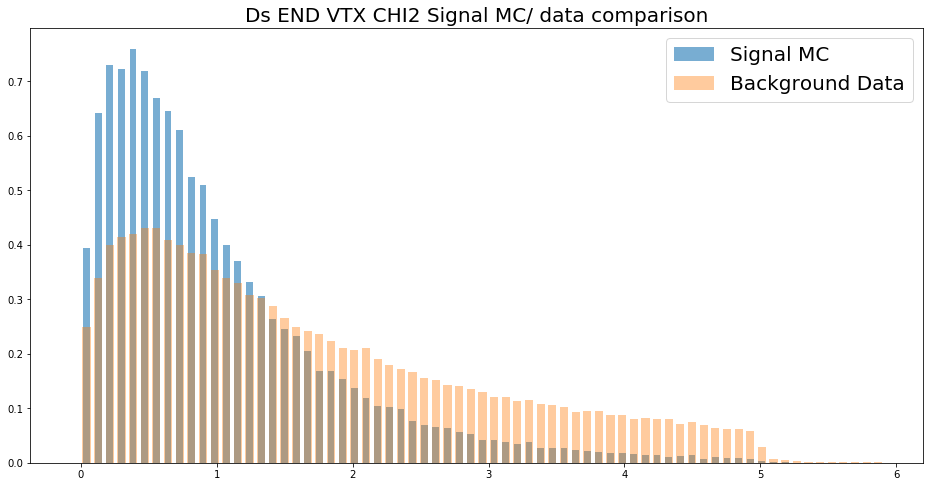

In [42]:

#Retrieve data from needed branch
MC_Ds_endvtx_chi2ratio=MC_tuple_dict["Ds_ENDVERTEX_CHI2"]/MC_tuple_dict["Ds_ENDVERTEX_NDOF"]
data_Ds_endvtx_chi2ratio=data_tuple_bkg["Ds_ENDVERTEX_CHI2"]/data_tuple_bkg["Ds_ENDVERTEX_NDOF"]

#Plot
plot_sb_comparison(nbins=70,particle="Ds", variable="END VTX CHI2", 
                   MC_sig=MC_Ds_endvtx_chi2ratio, data_bkg=data_Ds_endvtx_chi2ratio, 
                   width_MC=0.05, width_data=0.06)

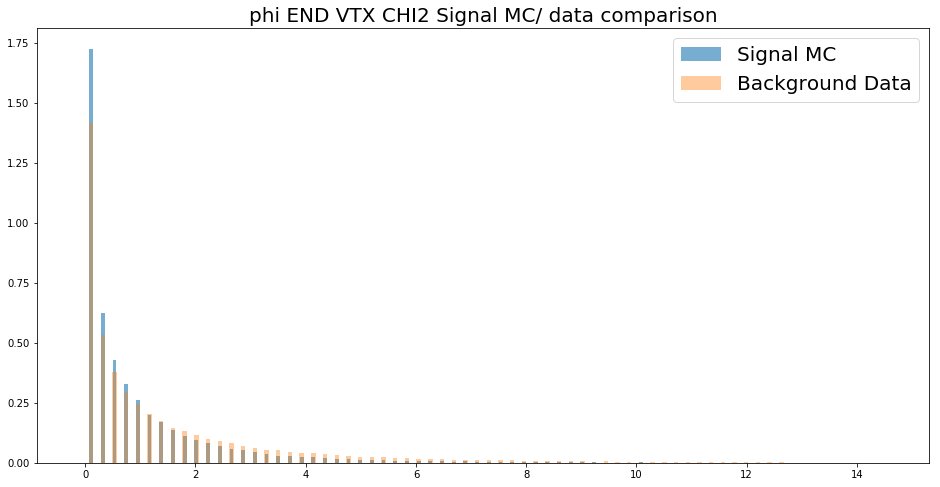

In [43]:

#Retrieve data from needed branch
MC_Ds_endvtx_chi2ratio=MC_tuple_dict["phi_ENDVERTEX_CHI2"]/MC_tuple_dict["phi_ENDVERTEX_NDOF"]
data_Ds_endvtx_chi2ratio=data_tuple_bkg["phi_ENDVERTEX_CHI2"]/data_tuple_bkg["phi_ENDVERTEX_NDOF"]

#Plot
plot_sb_comparison(nbins=70,particle="phi", variable="END VTX CHI2", 
                   MC_sig=MC_Ds_endvtx_chi2ratio, data_bkg=data_Ds_endvtx_chi2ratio, 
                   width_MC=0.07, width_data=0.08)

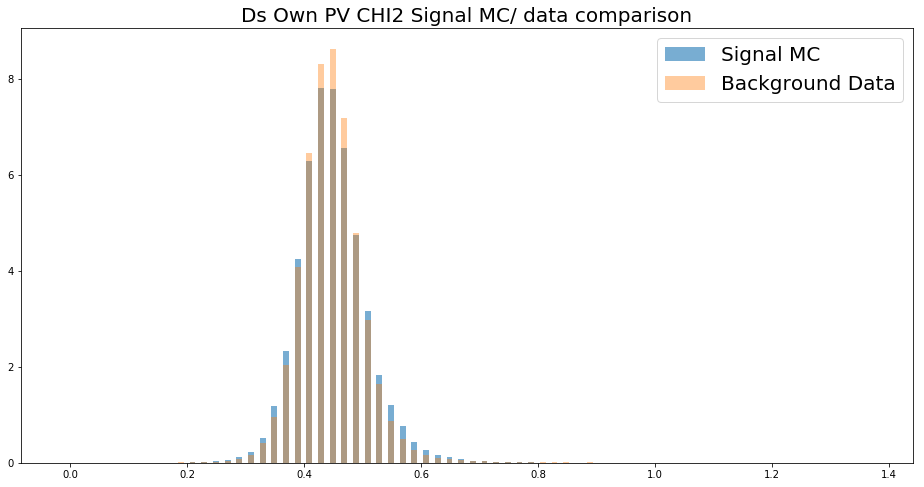

In [44]:
#Retrieve data from needed branch
MC_Ds_ownpv_chi2ratio=MC_tuple_dict["Ds_OWNPV_CHI2"]/MC_tuple_dict["Ds_OWNPV_NDOF"]
data_Ds_ownpv_chi2ratio=data_tuple_bkg["Ds_OWNPV_CHI2"]/data_tuple_bkg["Ds_OWNPV_NDOF"]

#Plot
plot_sb_comparison(nbins=70, particle="Ds", variable="Own PV CHI2", 
                   MC_sig=MC_Ds_ownpv_chi2ratio, data_bkg=data_Ds_ownpv_chi2ratio,
                   width_MC=0.01, width_data=0.01)

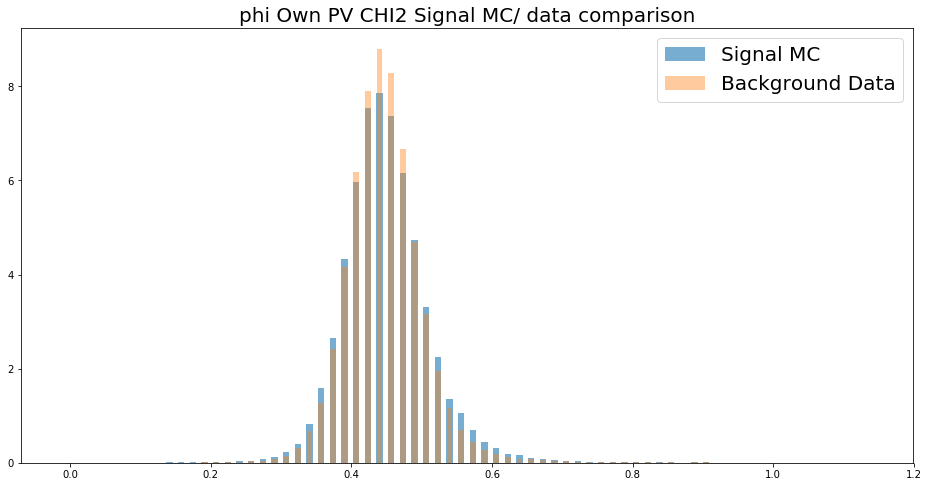

In [45]:
#Retrieve data from needed branch
MC_Ds_ownpv_chi2ratio=MC_tuple_dict["phi_OWNPV_CHI2"]/MC_tuple_dict["phi_OWNPV_NDOF"]
data_Ds_ownpv_chi2ratio=data_tuple_bkg["phi_OWNPV_CHI2"]/data_tuple_bkg["phi_OWNPV_NDOF"]

#Plot
plot_sb_comparison(nbins=70, particle="phi", variable="Own PV CHI2", 
                   MC_sig=MC_Ds_ownpv_chi2ratio, data_bkg=data_Ds_ownpv_chi2ratio,
                   width_MC=0.009, width_data=0.008)

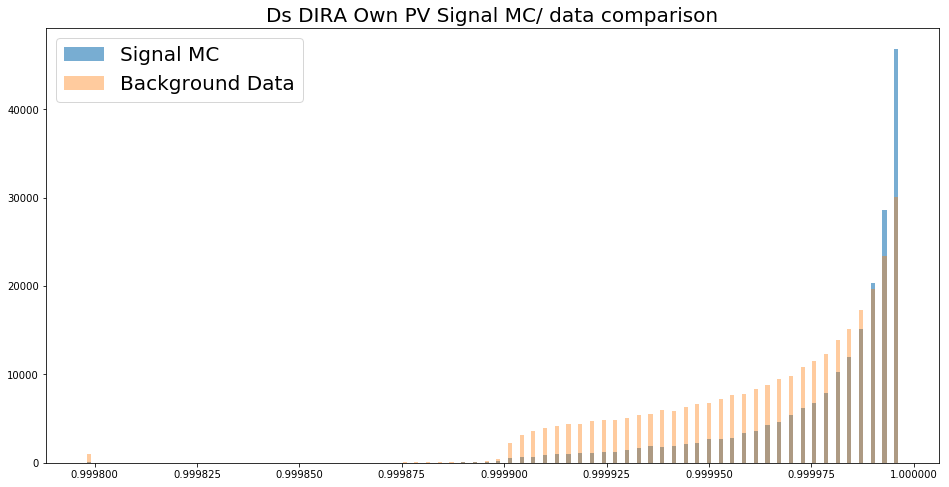

In [46]:
MC_Ds_DIRA_ownpv=MC_tuple_sig["Ds_DIRA_OWNPV"]
data_Ds_DIRA_ownpv=data_tuple_bkg["Ds_DIRA_OWNPV"]

#Plot
plot_sb_comparison(nbins=70, particle="Ds", variable="DIRA Own PV", 
                   MC_sig=MC_Ds_DIRA_ownpv, data_bkg=data_Ds_DIRA_ownpv,
                   width_MC=0.000001, width_data=0.000001)


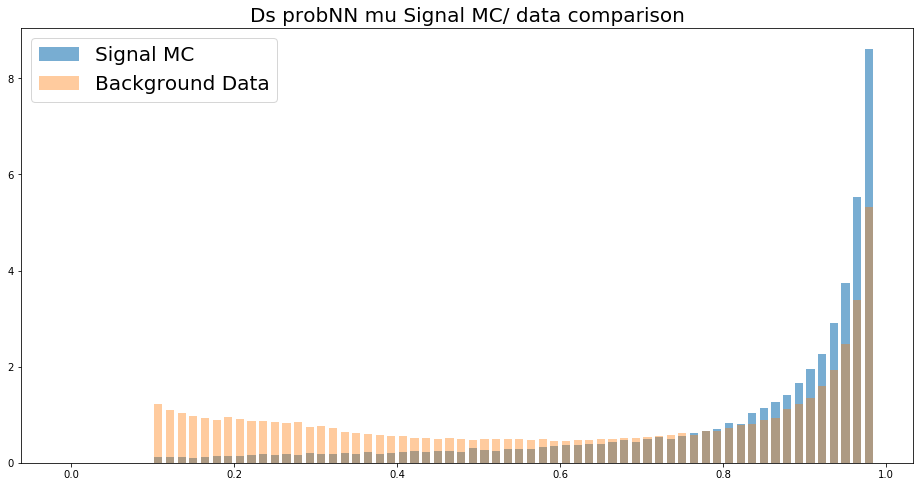

In [47]:
MC_probNNmu=MC_tuple_sig[l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index]]
data_probNNmu=data_tuple_bkg[l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index]]

#Plot
plot_sb_comparison(nbins=70, particle="Ds",variable="probNN mu", 
                   MC_sig=MC_probNNmu, data_bkg=data_probNNmu,
                   width_MC=0.01, width_data=0.01)

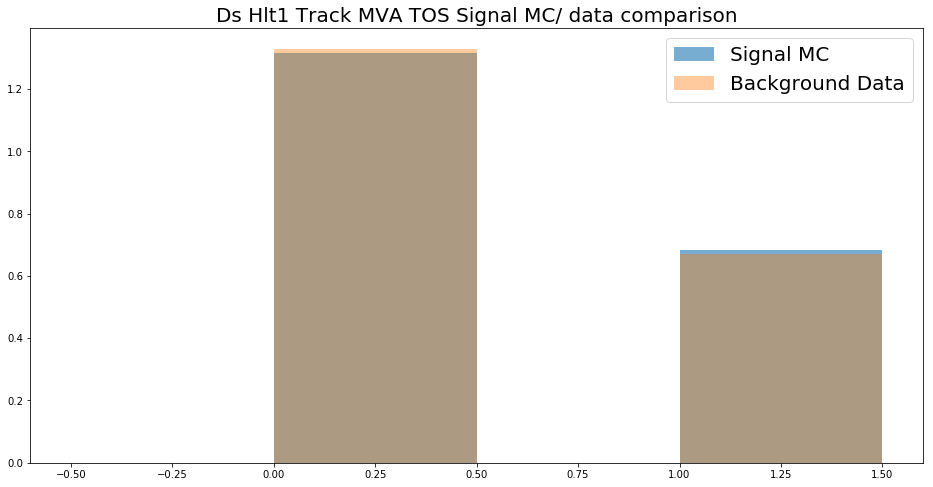

In [48]:
MC_Hlt1TrackMVA_TOS=MC_tuple_sig["Ds_Hlt1TrackMVADecision_TOS"]
data_Hlt1TrackMVA_TOS=data_tuple_bkg["Ds_Hlt1TrackMVADecision_TOS"]

#Plot
plot_sb_comparison(nbins=4, particle="Ds",variable="Hlt1 Track MVA TOS", 
                   MC_sig=MC_Hlt1TrackMVA_TOS, data_bkg=data_Hlt1TrackMVA_TOS,
                   width_MC=0.5, width_data=0.5)

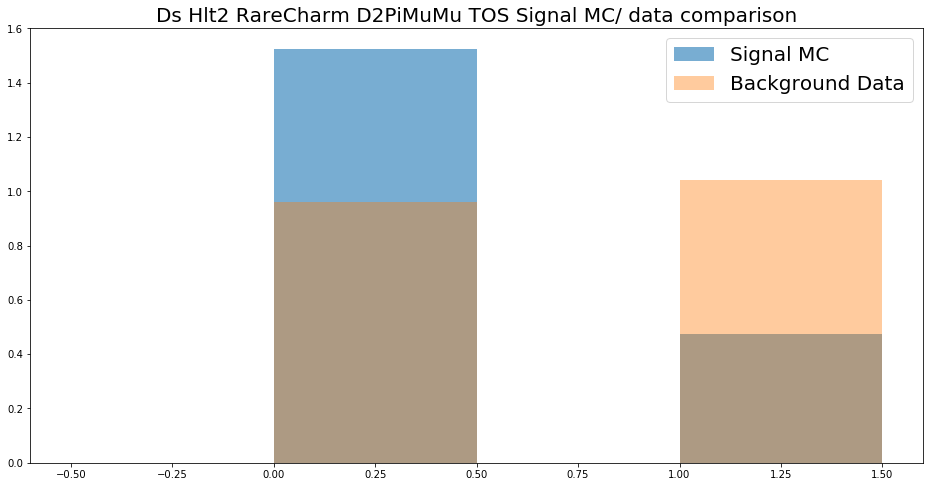

In [49]:
MC_Hlt2RareCharm_TOS=MC_tuple_sig["Ds_Hlt2RareCharmD2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+"OSDecision_TOS"]
data_Hlt2RareCharm_TOS=data_tuple_bkg["Ds_Hlt2RareCharmD2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+"OSDecision_TOS"]

#Plot
plot_sb_comparison(nbins=4, particle="Ds",variable="Hlt2 RareCharm D2Pi"+l_flv[l_index].capitalize()+l_flv[l_index].capitalize()+" TOS", 
                   MC_sig=MC_Hlt2RareCharm_TOS, data_bkg=data_Hlt2RareCharm_TOS,
                   width_MC=0.5, width_data=0.5)

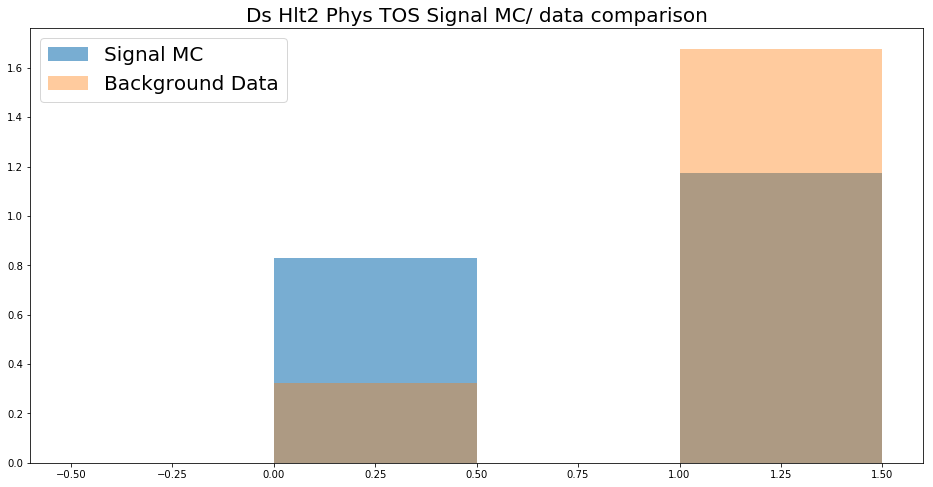

In [50]:
MC_Hlt2Phys_TOS=MC_tuple_sig["Ds_Hlt2Phys_TOS"]
data_Hlt2Phys_TOS=data_tuple_bkg["Ds_Hlt2Phys_TOS"]

plot_sb_comparison(nbins=4, particle="Ds",variable="Hlt2 Phys TOS", 
                   MC_sig=MC_Hlt2Phys_TOS, data_bkg=data_Hlt2Phys_TOS,
                   width_MC=0.5, width_data=0.5)

In [51]:
#h_data_under.SetLineColor(38)
#h_mc_under.SetLineColor(46)
#
#c1=r.TCanvas("c1","c1",1200,700)
#r.gStyle.SetOptStat(0)
#h_mc_under.Draw()
#h_data_under.Draw("same")
#
#legend = r.TLegend(0.9,0.8,0.6,0.9)
#legend.SetHeader("Ds End vertex chi2")
#legend.AddEntry(h_mc_under,"Signal MC","L")
#legend.AddEntry(h_data_under,"data below Ds reco mass MC","L")
#legend.Draw()
#c1.Update()
#c1.SaveAs("/home/hep/davide/Rphipi/plt.pdf")

In [52]:
with open('/disk/lhcb_data/davide/Rphipi/NN/'+l_flv[l_index]+l_flv[l_index]+'/MC_for_NN_'+l_flv[l_index]+l_flv[l_index]+'.pickle', 'wb') as handle:
    pickle.dump(MC_tuple_sig, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/disk/lhcb_data/davide/Rphipi/NN/'+l_flv[l_index]+l_flv[l_index]+'/data_for_NN_'+l_flv[l_index]+l_flv[l_index]+'.pickle', 'wb') as handle:
    pickle.dump(data_tuple_bkg, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/disk/lhcb_data/davide/Rphipi/NN_for_selection/'+l_flv[l_index]+l_flv[l_index]+'/data_for_NN_'+l_flv[l_index]+l_flv[l_index]+'.pickle', 'wb') as handle:
    pickle.dump(data_tuple_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)